> **Projet**: A CNN based Approach for Dish Recommendations

> **Binome**: BENZAKRY Aimad - MACHI imad

> **Encadre par**: Prof. QASSIMI Sara

> **Module**: Systemes de Recommandations & IoT

> **Annee academique**: 2023/2024


# Download and load the dataset:

In [ ]:
target_directory = '/content/drive/MyDrive/datasets'

# Use wget to download the dataset to the specified directory
!mkdir -p $target_directory
!wget -P $target_directory http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

--2023-12-29 18:27:22--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2023-12-29 18:27:23--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘/content/drive/MyDrive/datasets/food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  17.9MB/s    in 4m 30s  

2023-12-29 18:31:53 (17.7 MB/s) - ‘/content/drive/MyDrive/datasets/food-101.tar.gz’ saved [4996278331/4996278331]



In [ ]:
tar_gz_file_path = '/content/drive/MyDrive/datasets/food-101.tar.gz'
!tar -xzf $tar_gz_file_path -C $target_directory

In [ ]:
import os
dataset_path = '/content/drive/MyDrive/datasets/food-101/images'

# Get a list of class labels from the directory names in your dataset
class_labels = sorted(os.listdir(dataset_path))

In [ ]:
class_labels

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

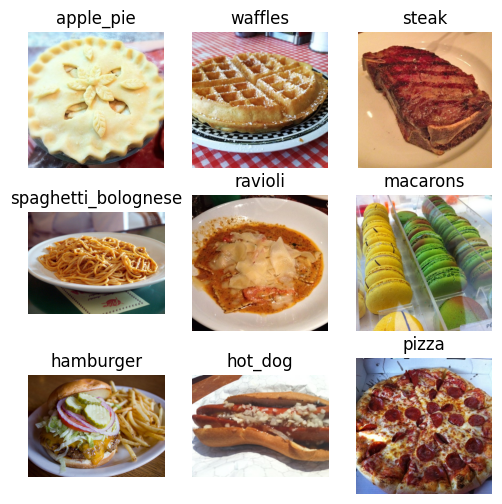

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def plot_images_in_grid(image_paths):
    # Create a 3x3 grid
    plt.figure(figsize=(6, 6))

    for i in range(len(image_paths)):
        # Read the image from the path
        img = Image.open(image_paths[i])
        class_name = image_paths[i].split('/')[7]
        # Add the image to the subplot
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

    plt.show()

# Example usage:
image_paths = [
    '/content/drive/MyDrive/datasets/food-101/images/apple_pie/1057810.jpg', #apple pie
    '/content/drive/MyDrive/datasets/food-101/images/waffles/1013333.jpg', #waffle
    '/content/drive/MyDrive/datasets/food-101/images/steak/1166047.jpg',
    '/content/drive/MyDrive/datasets/food-101/images/spaghetti_bolognese/1005431.jpg',
    '/content/drive/MyDrive/datasets/food-101/images/ravioli/1140179.jpg',
    '/content/drive/MyDrive/datasets/food-101/images/macarons/1010087.jpg',
    '/content/drive/MyDrive/datasets/food-101/images/hamburger/1041751.jpg',
    '/content/drive/MyDrive/datasets/food-101/images/hot_dog/101571.jpg',
    '/content/drive/MyDrive/datasets/food-101/images/pizza/1001116.jpg',
]

plot_images_in_grid(image_paths)


# Prepare the dataset:

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
batch_size = 64
img_size = (299, 299)


path_images = '/content/drive/MyDrive/datasets/food-101/images'

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    path_images,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    path_images,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


# Define and Compile the model:

In [ ]:
import tensorflow as tf
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, AveragePooling2D,Dropout,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler


# Load the pre-trained InceptionV3 model without top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of the InceptionV3 model
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = AveragePooling2D()(x)

x = Dropout(.5)(x)
x = Flatten()(x)

# x = GlobalAveragePooling2D()(base_model.output)
# x = Dense(128, activation='relu')(x)  # Add your custom dense layer(s)
output_layer = Dense(101, kernel_regularizer=l2(.0005), activation='softmax')(x)  # Adjust num_classes for your specific task

model = Model(inputs=base_model.input, outputs=output_layer)
opt = SGD(lr=.1, momentum=.9)
# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

def schedule(epoch):
    if epoch < 5:
        return 0.001
    elif epoch < 10:
        return .0002
    elif epoch < 15:
        return 0.00002
    else:
        return .0000005
lr_scheduler = LearningRateScheduler(schedule)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, Callback
# Define a ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint('/content/drive/MyDrive/RS_Food101/model_checkpoint.h2',
                                      save_weights_only=False,  # Save the entire model, not just the weights
                                      save_freq='epoch')

# Model training:

In [ ]:
# Train the model
history = model.fit(train_generator, epochs=20, validation_data=validation_generator, callbacks=[lr_scheduler,checkpoint_callback])

Epoch 1/20
1263/1263 [==============================] - 539s 420ms/step - loss: 2.5329 - accuracy: 0.4265 - val_loss: 1.9290 - val_accuracy: 0.5438 - lr: 0.0010
Epoch 2/20
1263/1263 [==============================] - 533s 422ms/step - loss: 1.7482 - accuracy: 0.5819 - val_loss: 1.8243 - val_accuracy: 0.5731 - lr: 0.0010
Epoch 3/20
1263/1263 [==============================] - 528s 418ms/step - loss: 1.4656 - accuracy: 0.6409 - val_loss: 1.8386 - val_accuracy: 0.5778 - lr: 0.0010
Epoch 4/20
1263/1263 [==============================] - 527s 418ms/step - loss: 1.2872 - accuracy: 0.6837 - val_loss: 1.8103 - val_accuracy: 0.5862 - lr: 0.0010
Epoch 5/20
1263/1263 [==============================] - 524s 415ms/step - loss: 1.1498 - accuracy: 0.7186 - val_loss: 1.8272 - val_accuracy: 0.5883 - lr: 0.0010
Epoch 6/20
1263/1263 [==============================] - 517s 409ms/step - loss: 0.9182 - accuracy: 0.7833 - val_loss: 1.7121 - val_accuracy: 0.6105 - lr: 2.0000e-04
Epoch 7/20
1263/1263 [========

# Model Evaluation:

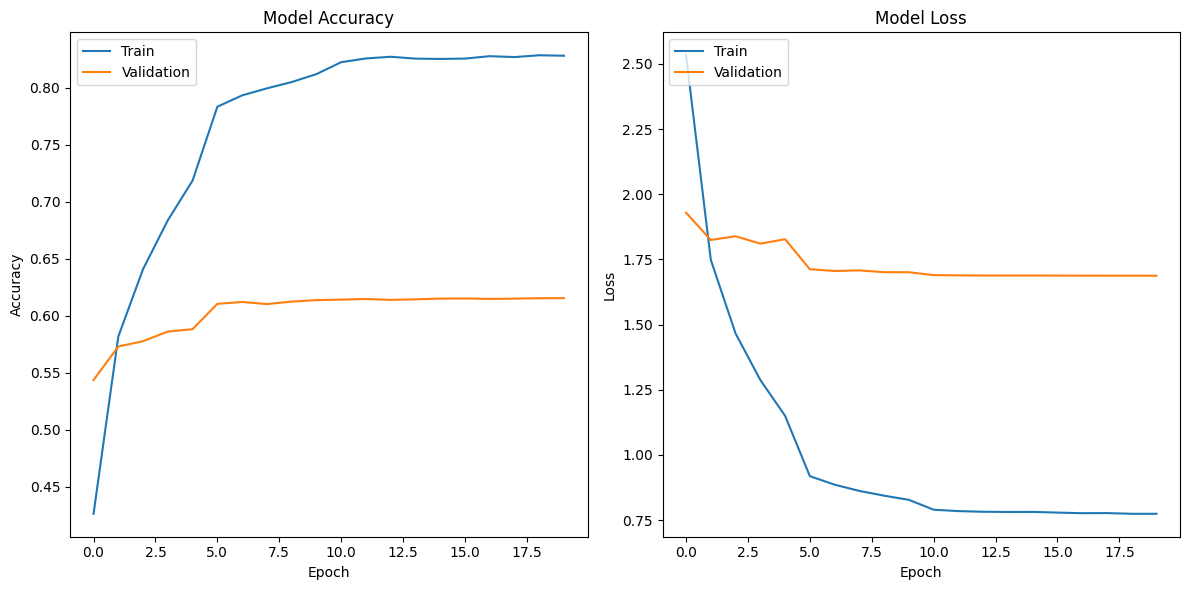

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/RS_Food101/model_checkpoint.h2')

# Recommandations:

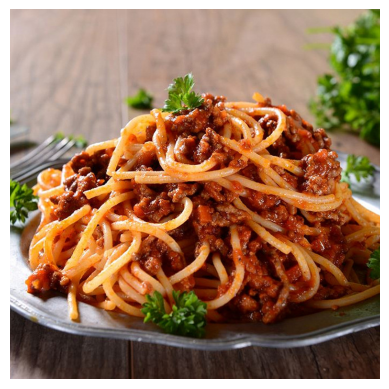

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/datasets/i84653-spaghettis-bolognaise-rapides.jpg'

# Open the image file
img = Image.open(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np

image_path = '/content/drive/MyDrive/datasets/i84653-spaghettis-bolognaise-rapides.jpg'

# Load the image and resize it to match the input size of the Inception model (299x299)
img = image.load_img(image_path, target_size=(299, 299))

# Convert the image to a numpy array and preprocess it
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

inception_model = loaded_model

# Make a prediction
predictions = inception_model.predict(img_array)

class_labels = sorted(os.listdir('/content/drive/MyDrive/datasets/food-101/images'))

# Map predicted class indices to labels
decoded_predictions = [(class_labels[i], predictions[0][i]) for i in range(len(class_labels))]

# Sort predictions by score
decoded_predictions.sort(key=lambda x: x[1], reverse=True)

# Print the top-3 predicted classes
for i, (label, score) in enumerate(decoded_predictions[:3]):
    print(f"{i + 1}: {label} ({score:.2f})")


1/1 [==============================] - 0s 29ms/step
1: spaghetti_bolognese (0.74)
2: pad_thai (0.22)
3: fried_calamari (0.01)


In [ ]:
# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

# Save the TFLite model
tflite_model_path = '/content/drive/MyDrive/RS_Food101/model.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f'TFLite model saved to: {tflite_model_path}')

TFLite model saved to: /content/drive/MyDrive/RS_Food101/model.tflite
